In [5]:
import requests
import json
import re
#import pycountry
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from pathlib import Path

## Apple

In [6]:
appledf = pd.read_csv("../websitedata/appletopsongsinternational2023.csv")
#print(appledf.shape)
print(type(appledf))

appledf.dropna

appledf = pd.melt(appledf, id_vars=["Pos", "P+", "Artist and Title", "Days", "Pk", "(x?)", "Pts", "Pts+", "TPts"], 
                   var_name="country", value_name="country_rank").dropna()

#print(appledf.isnull().sum())
#print(appledf.isna().sum())

appledf = appledf.drop(columns=["P+", "Pts+", "TPts"])
appledf = appledf.rename(columns={"Pos": "Chart Position","Days": "Position Duration", "Pk": "Peak", 
                                  "Pts": "Points", "country": "Country", "country_rank": "Country Rank"})
#appledf = appledf["Country"].apply(lambda x: pycountry.countries.get(alpha_3=x).name 
                                               #if len(x) == 3 else pycountry.countries.get(alpha_2=x).name)

#print(appledf["(x?)"].value_counts())

appledf["(x?)"] = appledf["(x?)"].str.replace(r'[()]|x', "", regex = True)
#appledf = appledf[appledf["Country"].str.contains("^US", na=False)]


print(appledf)
appledf.to_csv("../websitedata/apple_py.csv")
print(appledf.shape)


<class 'pandas.core.frame.DataFrame'>
       Chart Position                     Artist and Title  Position Duration  \
0                   1        Doja Cat - Paint The Town Red                 68   
1                   2                  Tate McRae - greedy                 27   
2                   3                        Drake - IDGAF                  6   
3                   4         Drake - First Person Shooter                  6   
4                   5               Drake - Virginia Beach                  6   
...               ...                                  ...                ...   
11747               7          Taylor Swift - Cruel Summer                245   
11770              30  Billie Eilish - What Was I Made For                 90   
11773              33             Taylor Swift - Anti-Hero                356   
11802              62                 Taylor Swift - Lover                412   
11810              70                      SZA - Kill Bill             

## Netflix

In [11]:
netflixdf = pd.read_csv("../websitedata/netflixWorld2022.csv")
#print(netflixdf.shape)
#print(type(netflixdf))

netflixdf = netflixdf.rename(columns={"Top TV shows on Netflix worldwide 2022": "Title", "Unnamed: 1": "Points"})


netflixdf.drop([0,1], inplace=True)
#print(netflixdf.isnull().sum())
#print(netflixdf.isna().sum())


print(netflixdf)
netflixdf.to_csv("../websitedata/netflix_py.csv")
print(netflixdf.shape)

                                         Title  Points
2                              Stranger Things  63,800
3                                     Manifest  53,337
4                               Inventing Anna  34,393
5   Dahmer - Monster: The Jeffrey Dahmer Story  34,086
6                                   Bridgerton  30,229
7                                    Wednesday  30,102
8                      Café con aroma de mujer  28,765
9                          Pasión de gavilanes  27,591
10                          All of Us Are Dead  26,955
11                                   The Crown  25,874
12                  Extraordinary Attorney Woo  24,352
13                Pablo Escobar, The Drug Lord  24,273
14                                       Ozark  23,757
15                                 The Sandman  23,026
16                           Business Proposal  21,123
17                         Yo soy Betty la fea  20,912
18                                   Cobra Kai  20,786
19        

# Exploring Data Tab

In [7]:
print(appledf.describe())

newAppledf = appledf.drop(["Artist and Title", "Country"], axis=1)
newAppledf = newAppledf.reset_index(drop=True)

print(newAppledf.head())

       Chart Position  Position Duration        Peak        Points  \
count      836.000000         836.000000  836.000000    836.000000   
mean        42.502392         308.492823    1.671053   7506.009569   
std         49.812835         427.604273    0.724705   5080.042094   
min          1.000000           6.000000    1.000000   1056.000000   
25%          5.000000          68.000000    1.000000   2739.000000   
50%         30.000000         132.000000    2.000000   5425.000000   
75%         62.000000         393.000000    2.000000  12359.000000   
max        198.000000        1982.000000    3.000000  16920.000000   

       Country Rank  
count    836.000000  
mean      61.480861  
std       52.836577  
min        1.000000  
25%       16.000000  
50%       48.500000  
75%       93.000000  
max      200.000000  
   Chart Position  Position Duration  Peak (x?)  Points  Country Rank
0               1                 68     1   45   16920          29.0
1               2              

In [8]:
newAppledf["(x?)"] = newAppledf["(x?)"].astype(int)
newAppledf["Country Rank"] = newAppledf["Country Rank"].astype(int)
print(newAppledf.dtypes)
newAppledf.to_csv("../websitedata/newApple_py.csv")

# Summary
print(newAppledf.describe())

# Correlation
print(newAppledf.corr())

# Outliers

Chart Position       int64
Position Duration    int64
Peak                 int64
(x?)                 int32
Points               int64
Country Rank         int32
dtype: object
       Chart Position  Position Duration        Peak        (x?)  \
count      836.000000         836.000000  836.000000  836.000000   
mean        42.502392         308.492823    1.671053   32.011962   
std         49.812835         427.604273    0.724705   47.504048   
min          1.000000           6.000000    1.000000    1.000000   
25%          5.000000          68.000000    1.000000    3.000000   
50%         30.000000         132.000000    2.000000   14.000000   
75%         62.000000         393.000000    2.000000   32.000000   
max        198.000000        1982.000000    3.000000  177.000000   

             Points  Country Rank  
count    836.000000    836.000000  
mean    7506.009569     61.480861  
std     5080.042094     52.836577  
min     1056.000000      1.000000  
25%     2739.000000     16.0000

In [13]:
# Summary FOR TEXT I THINK

# WIKI (word cloud for visuals and Vectorizaiton for Analysis)

In [1]:
import wikipedia

wikipedia.search("Stranger Things", results=10, suggestion=False)

['Stranger Things',
 'Eleven (Stranger Things)',
 'List of Stranger Things episodes',
 'Stranger Things (season 4)',
 'Vecna (Stranger Things)',
 'Stranger Things (season 3)',
 'List of Stranger Things characters',
 'Stranger Things (season 1)',
 'Stranger Things (season 2)',
 'Stranger Things: The First Shadow']

In [2]:
page = wikipedia.WikipediaPage("Stranger Things (season 3)").content
print(page)
# this gets text content from the page https://en.wikipedia.org/wiki/Stranger_Things_(season_3)

The third season of the American science fiction horror television series Stranger Things was released worldwide on the streaming service Netflix on July 4, 2019. The series was created by the Duffer Brothers, who also serve as executive producers along with Shawn Levy, Dan Cohen and Iain Paterson. It was preceded by season 2 and succeeded by season 4. 
The season stars Winona Ryder, David Harbour, Finn Wolfhard, Millie Bobby Brown, Gaten Matarazzo, Caleb McLaughlin, Noah Schnapp, Sadie Sink, Natalia Dyer, Charlie Heaton, Joe Keery, Dacre Montgomery, Maya Hawke, Priah Ferguson, and Cara Buono. Brett Gelman, Francesca Reale, Cary Elwes, Alec Utgoff, and Andrey Ivchenko appear in recurring roles. The season received positive reviews from critics, who praised the visuals, humor, performances, and emotional weight, though some criticized its excessive pop culture references and narrative structure.


== Premise ==
In the summer of 1985, in Hawkins, the newly opened Starcourt Mall has becom

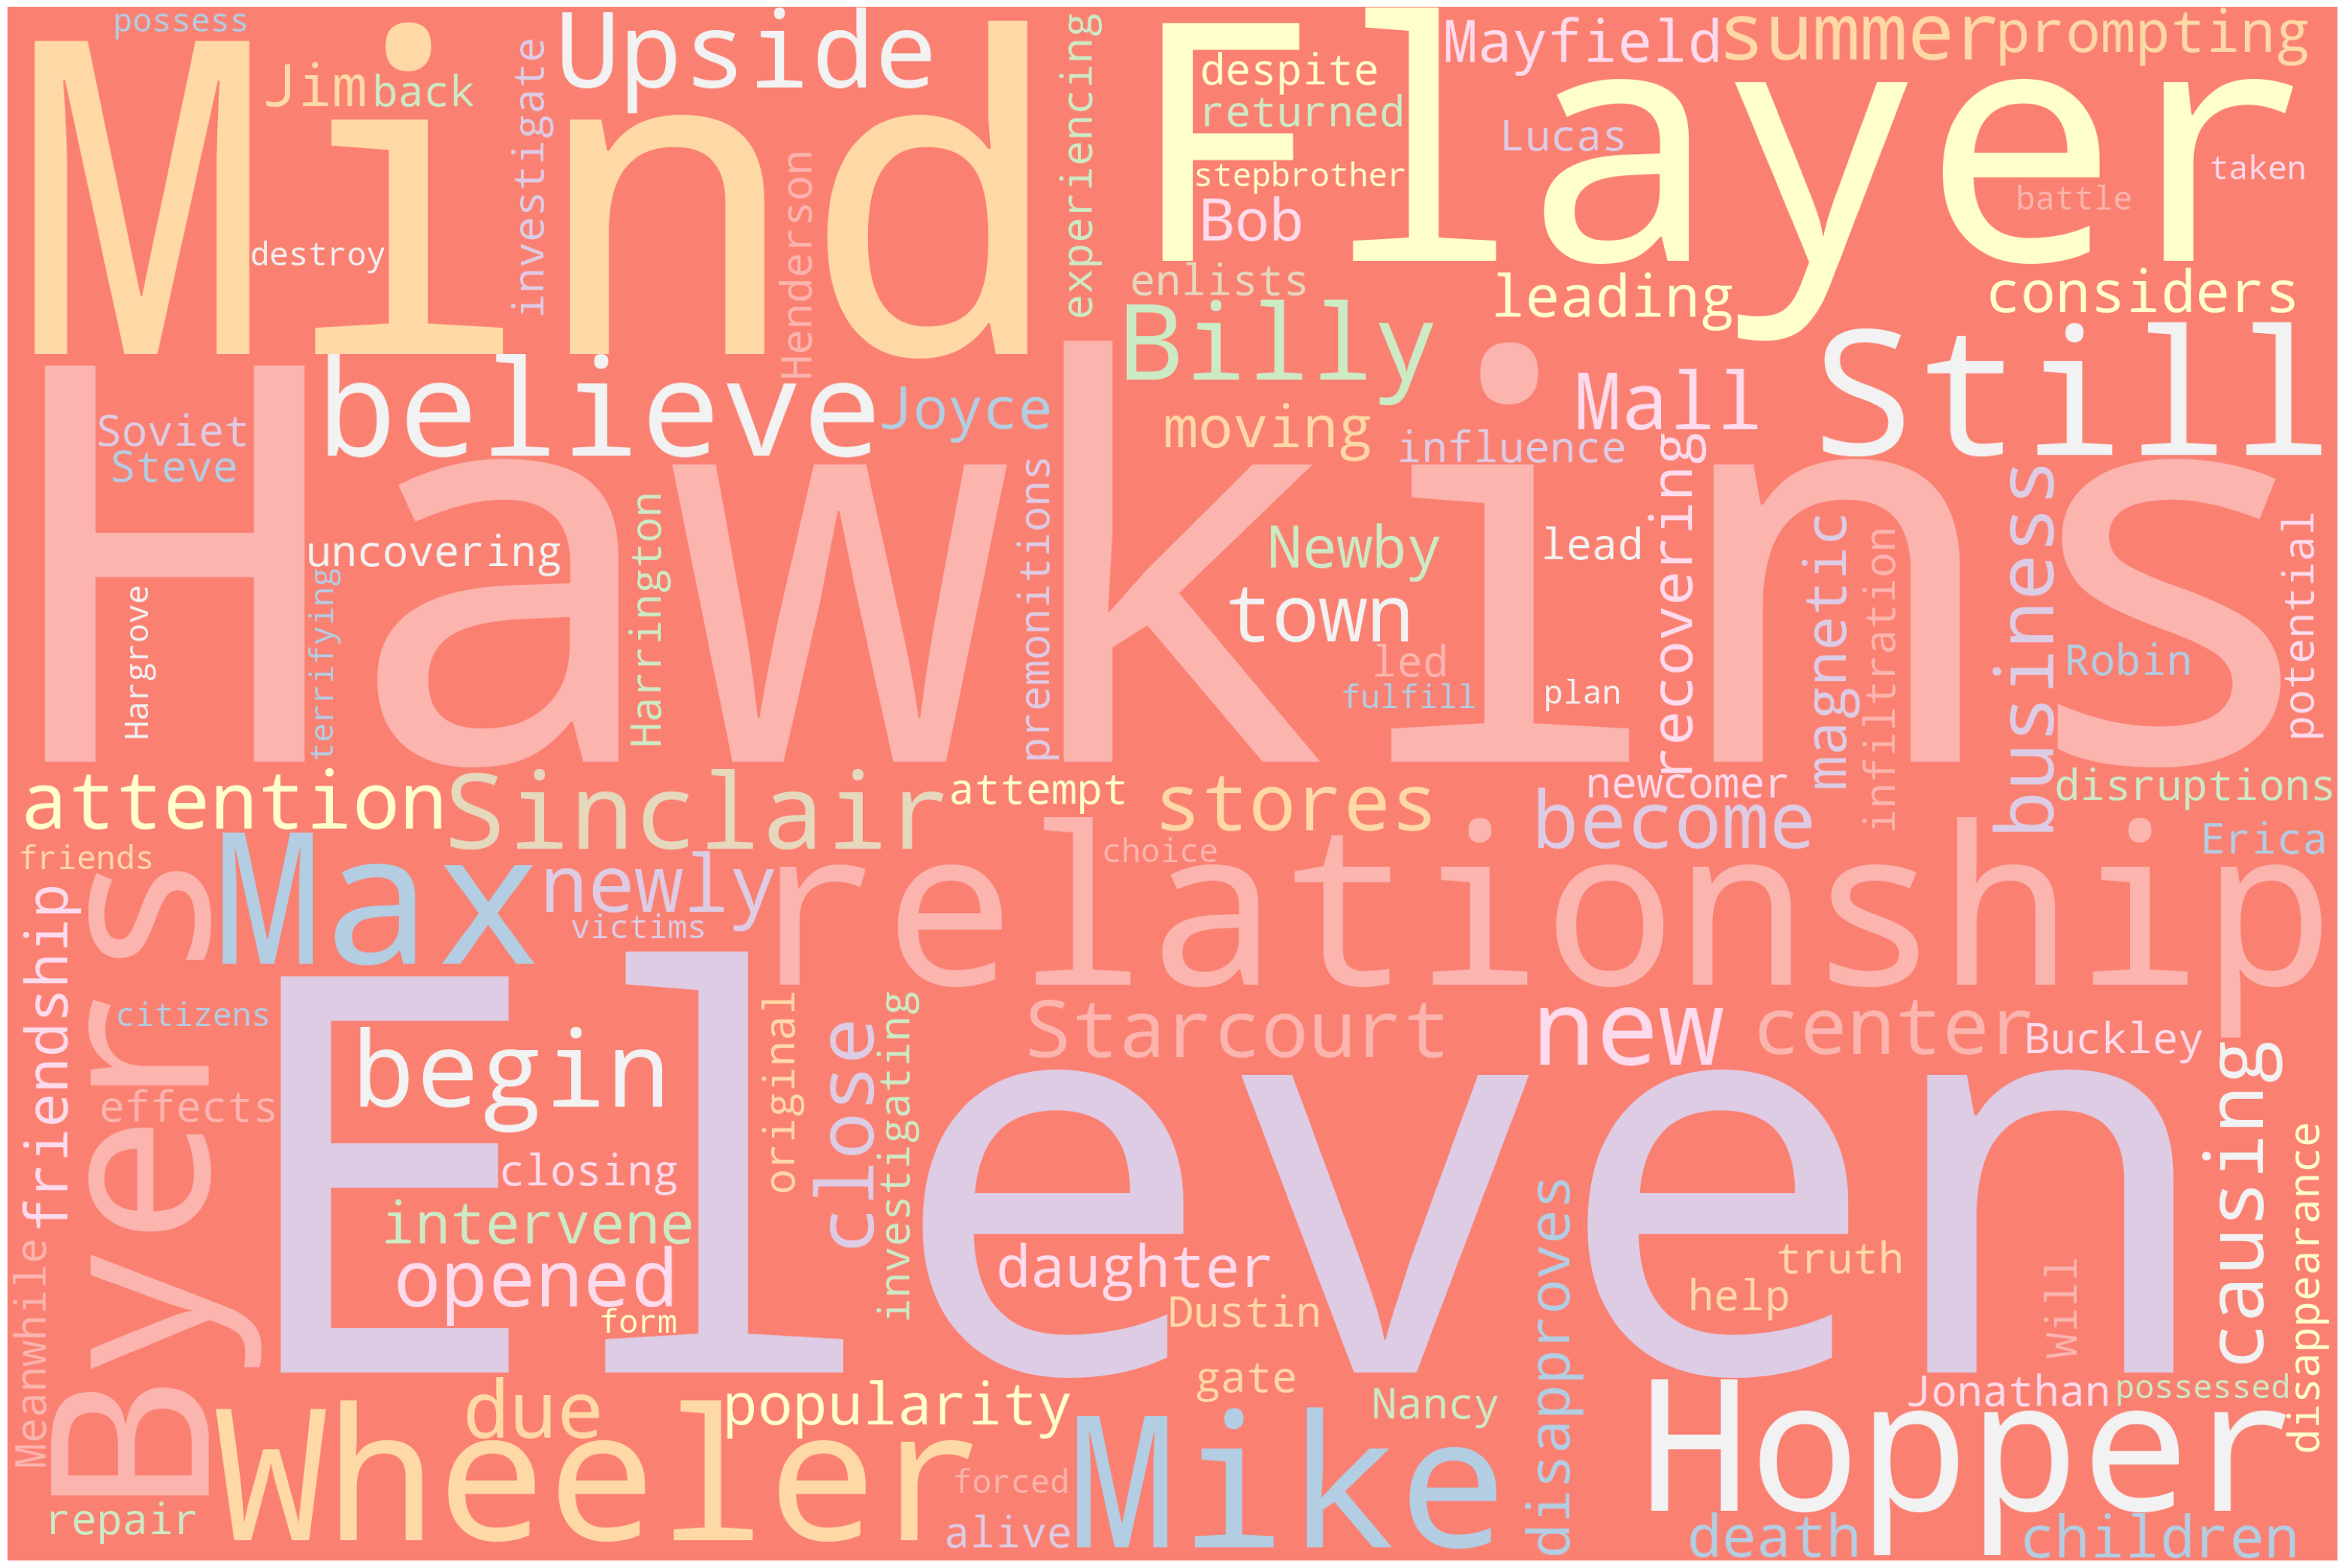

In [3]:
# MODIFIED FROM 
# https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5
def generate_word_cloud(my_text):
    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt
    # exit()
    # Import package
    # Define a function to plot word cloud
    def plot_cloud(wordcloud):
        # Set figure size
        plt.figure(figsize=(40, 30))
        # Display image
        plt.imshow(wordcloud) 
        # No axis details
        plt.axis("off");

    # Generate word cloud
    wordcloud = WordCloud(
        width = 3000,
        height = 2000, 
        random_state=1, 
        background_color='salmon', 
        colormap='Pastel1', 
        collocations=False,
        stopwords = STOPWORDS).generate(my_text)
    plot_cloud(wordcloud)
    plt.show()

page = "In the summer of 1985, in Hawkins, the newly opened Starcourt Mall has become the center of attention in town, causing other stores to close their business due to its popularity. Jim Hopper disapproves of Mike Wheeler's relationship with his daughter Eleven, prompting him to intervene in their relationship, and leading to Eleven's friendship with Max Mayfield. Still recovering from Bob Newby's death, Joyce Byers considers moving out of Hawkins with her children. However, magnetic disruptions lead her to believe that the Upside Down has returned, so she enlists Hopper's help in uncovering the truth. While Mike and Lucas Sinclair attempt to repair his relationship with Eleven, Will Byers begins experiencing premonitions from the Upside Down, despite Eleven's closing of the original gate that led to his disappearance. He believes the Mind Flayer is still alive and back in Hawkins. As Nancy Wheeler and Jonathan Byers investigate the effects of the Mind Flayer's influence, Dustin Henderson, Steve Harrington, newcomer Robin Buckley, and Erica Sinclair begin investigating a potential Soviet infiltration of Hawkins. Meanwhile, Max's stepbrother Billy Hargrove is taken over by the Mind Flayer, forced to possess other citizens of Hawkins to fulfill the Mind Flayer's new plan. Eleven and her friends have no choice but to battle Billy, the other possessed victims, and destroy the Mind Flayer in its new and terrifying form, once and for all."
generate_word_cloud(page)

In [14]:
import wikipedia

wikipedia.search("Manifest", results=10, suggestion=False)

['Manifest',
 'Manifest destiny',
 'Democracy Manifest',
 'Manifest (TV series)',
 'Manifest (CLI)',
 'Manifest (convention)',
 'Manifest (transportation)',
 'Manifest!',
 'Manifest file',
 'List of Manifest episodes']

In [15]:
page = wikipedia.WikipediaPage("Manifest (TV series)").content
print(page)
# this gets text content from the page for Manifest the TV show

Manifest is an American supernatural drama television series created by Jeff Rake that premiered on September 24, 2018, on NBC. It centers on the passengers and crew of a commercial airliner who suddenly reappear after being presumed dead for five and a half years. It stars Melissa Roxburgh, Josh Dallas, Athena Karkanis, J. R. Ramirez, Luna Blaise, Jack Messina, Parveen Kaur, Matt Long, Holly Taylor, Daryl Edwards, and Ty Doran.
In October 2018, NBC ordered further episodes for the first season and subsequently renewed the series for a second season that aired in 2020, and again for a third in 2021. In June 2021, the series was canceled by NBC after three seasons. The series was added to Netflix shortly before it was canceled and immediately topped the viewing charts, persuading Netflix to renew Manifest for a fourth and final season consisting of twenty episodes, with part one premiering on November 4, 2022, and part two premiering on June 2, 2023.


== Premise ==
While traveling from

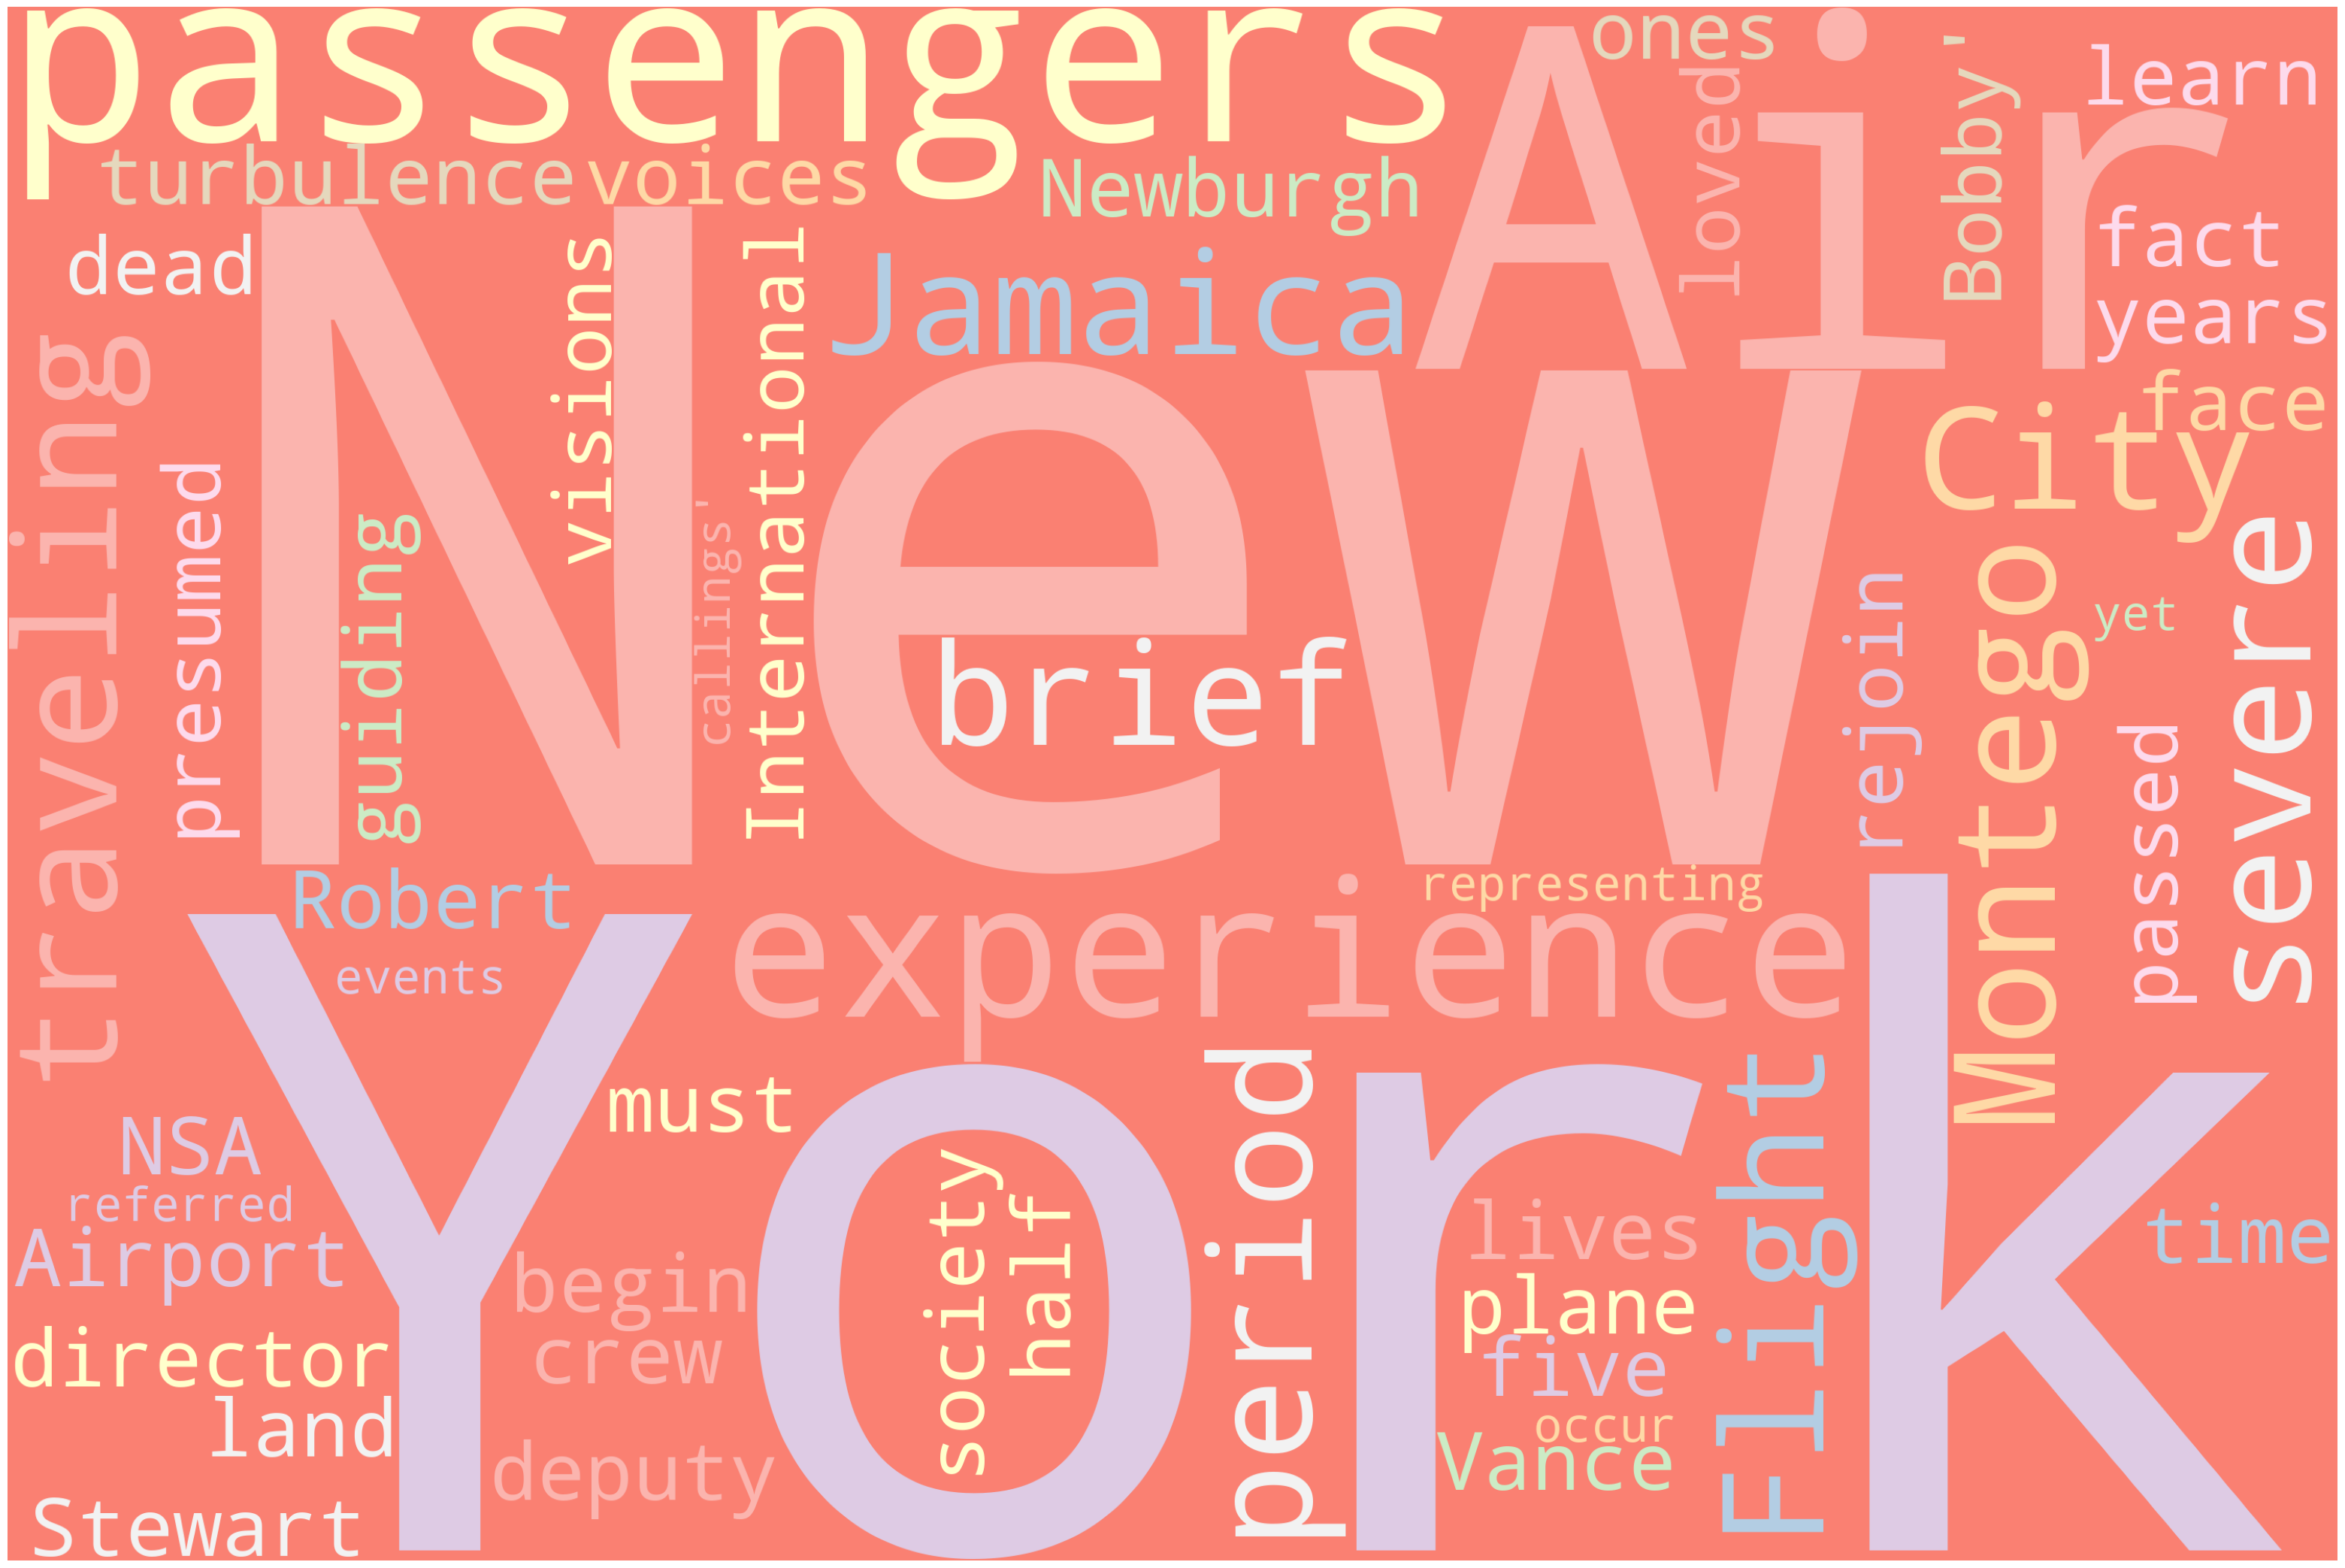

In [17]:
# MODIFIED FROM 
# https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5
def generate_word_cloud(my_text):
    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt
    # exit()
    # Import package
    # Define a function to plot word cloud
    def plot_cloud(wordcloud):
        # Set figure size
        plt.figure(figsize=(40, 30))
        # Display image
        plt.imshow(wordcloud) 
        # No axis details
        plt.axis("off");

    # Generate word cloud
    wordcloud = WordCloud(
        width = 3000,
        height = 2000, 
        random_state=1, 
        background_color='salmon', 
        colormap='Pastel1', 
        collocations=False,
        stopwords = STOPWORDS).generate(my_text)
    plot_cloud(wordcloud)
    plt.show()

page = "While traveling from Jamaica to New York City, Montego Air Flight 828 experiences a brief period of severe turbulence. When they land at Stewart International Airport in Newburgh, New York, the plane's 191 passengers and crew learn from NSA deputy director Robert 'Bobby' Vance that over five and a half years have passed while they were in the air, during which time they were presumed dead. As they rejoin society, the passengers must face the fact that their lives—and loved ones—are not the same as they were, while they also begin to experience guiding voices and visions representing events yet to occur, referred to as 'callings'."

generate_word_cloud(page)

In [18]:
import wikipedia

wikipedia.search("Inventing Anna", results=10, suggestion=False)

['Inventing Anna',
 'Anna Sorokin',
 'Julia Garner',
 'Anna Chlumsky',
 'Kacy Duke',
 'Alexis Floyd',
 'Rachel DeLoache Williams',
 'Jessica Pressler',
 'Shonda Rhimes',
 'Marika Domińczyk']

In [19]:
page = wikipedia.WikipediaPage("Inventing Anna").content
print(page)
# this gets text content from the page for Manifest the TV show

Inventing Anna is an American drama television miniseries created by Shonda Rhimes, inspired by the story of Anna Sorokin and the article in New York titled "How Anna Delvey Tricked New York's Party People" by Jessica Pressler. It was produced by Shondaland. Netflix released the miniseries on February 11, 2022.The miniseries stars Julia Garner in the title role. Critics praised its performances (particularly Garner) but criticized its inconsistent tone.


== Premise ==
Inspired by the true story of a total fake. Under the assumed name Anna Delvey, Russian-born Anna Sorokin infiltrated New York's High society by convincing them she was a German socialite and an heiress to a massive fortune, all while scheming and scamming them out of millions.


== Cast and characters ==


=== Main ===
Anna Chlumsky as Vivian Kent
Julia Garner as Anna "Delvey" Sorokin
Arian Moayed as Todd Spodek
Katie Lowes as Rachel Williams
Alexis Floyd as Neff Davis
Anders Holm as Jack
Anna Deavere Smith as Maud
Jeff

# Vectorizations of top 3

# HISTOGRAMS for wikis